In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv
/kaggle/input/firstimage/firstimage.jpg
/kaggle/input/credit-card-data-taiwan/default of credit card clients.xls


# Credit Card Prediction

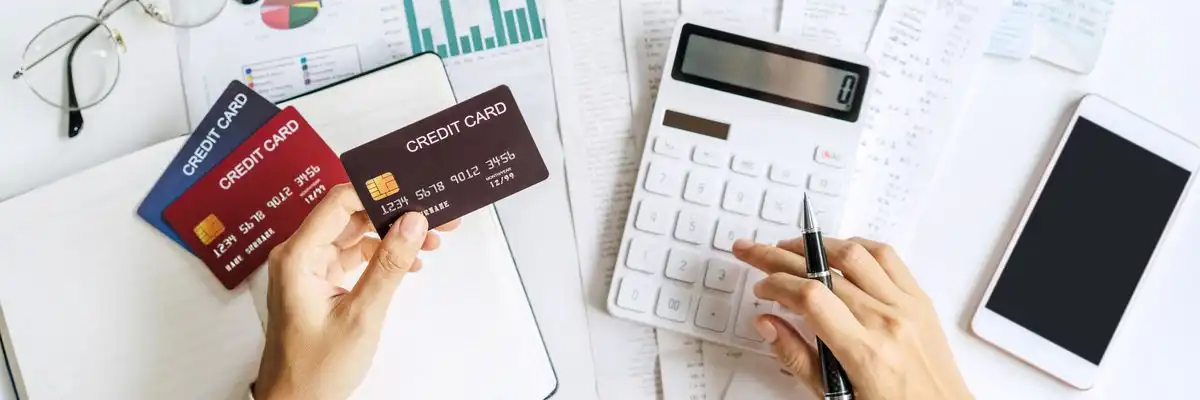

In [2]:
from IPython.display import Image
Image(filename="/kaggle/input/firstimage/firstimage.jpg", width=800, height=150)

In [3]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
#import dataset and check its content
df = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
df.tail(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [6]:
#get the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#get the statistical analysis on dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
datashape = df.shape
print(f'The dataset has {datashape[0]} number of rows and {datashape[1]} number of columns.')

The dataset has 30000 number of rows and 25 number of columns.


## Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment * delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


we need to chane the some column names,these includes PAY_0 to PAY_1 and default.payment.next.month: to DEFAULT_PAY

In [9]:
df_copy = df.copy()

In [10]:
df_copy.rename(columns={'default.payment.next.month':'DEFAULT_PAY'}, inplace=True)
df_copy.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

we have to drop id column has it has no value in our analysis

In [11]:
df_copy.drop(columns = ['ID'],inplace = True)

In [12]:
df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAY'],
      dtype='object')

We can see that the column changes has been made to the dataset

We check the missing values in the dataset

In [13]:
df_copy.isna().sum()

LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
DEFAULT_PAY    0
dtype: int64

There is no missing values in the dataset

In [14]:
df_copy.value_counts('DEFAULT_PAY',normalize=True) * 100

DEFAULT_PAY
0    77.88
1    22.12
Name: proportion, dtype: float64

We can see that about 77% of the dataset is zero,and about 22% is 1

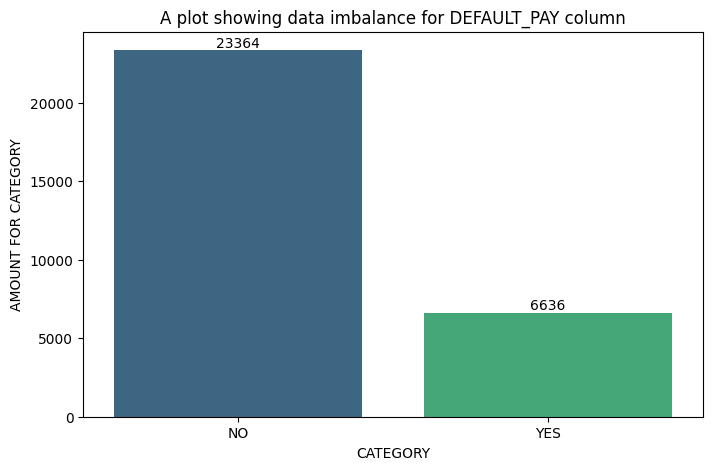

In [15]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df_copy,x = 'DEFAULT_PAY',palette='viridis');
plt.xticks(df_copy.DEFAULT_PAY.unique(),['Yes'.upper(),'No'.upper()])
plt.ylabel('Amount for category'.upper())
plt.xlabel('category'.upper())
for label in ax.containers:
    ax.bar_label(label)
plt.title("A plot showing data imbalance for DEFAULT_PAY column");

As we can see the data is Very highly imbalanced and nned to be fixed using data balancing techniques like smote before model inferencing

next we check other categorical columns in the dataset

In [16]:
df_copy

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [17]:
df_copy.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

0 being onw of the category has note been defined by the dataset annotator,Marital status (1=married, 2=single, 3=others),so we either drop it or merge it to 3=others,we will do the latter

In [18]:
df_copy.loc[:, 'MARRIAGE'] = df_copy.loc[:, 'MARRIAGE'].replace(0, 3)
df_copy.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [19]:
marriage_vars = ['married'.upper(),'single'.upper(),'others'.upper()]

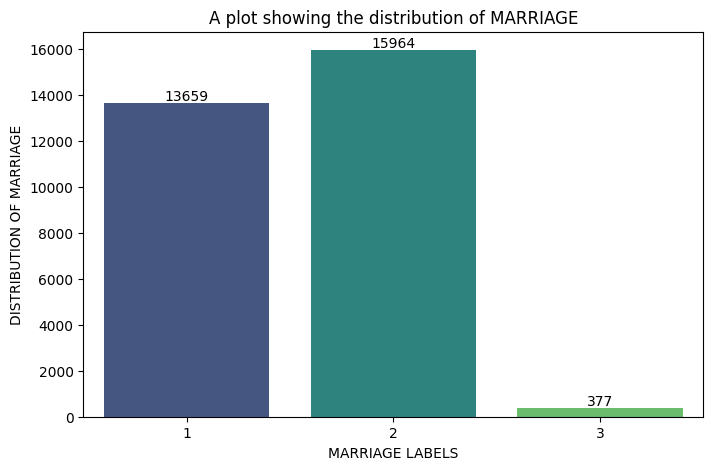

In [20]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df_copy,x = 'MARRIAGE',palette='viridis')
#plt.xticks([1, 2, 3],marriage_vars)
plt.ylabel('Distribution of marriage'.upper())
plt.xlabel('marriage labels'.upper())
for label in ax.containers:
    ax.bar_label(label)
plt.title("A plot showing the distribution of MARRIAGE");

In [21]:
df_copy.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown),so as we can see university level has a higher count in the distribution

we have to merge o with 14 data rows to 5 called unknown and then merge 5 to 6 since both of them are called unknown

In [22]:
df_copy.loc[:, 'EDUCATION'] = df_copy.loc[:, 'EDUCATION'].replace(6,5)
df_copy.loc[:, 'EDUCATION'] = df_copy.loc[:, 'EDUCATION'].replace(0,5)
df_copy['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      345
4      123
Name: count, dtype: int64

In [23]:
education_vars = ['graduate school', 'university', 'high school', 'others', 'unknown']

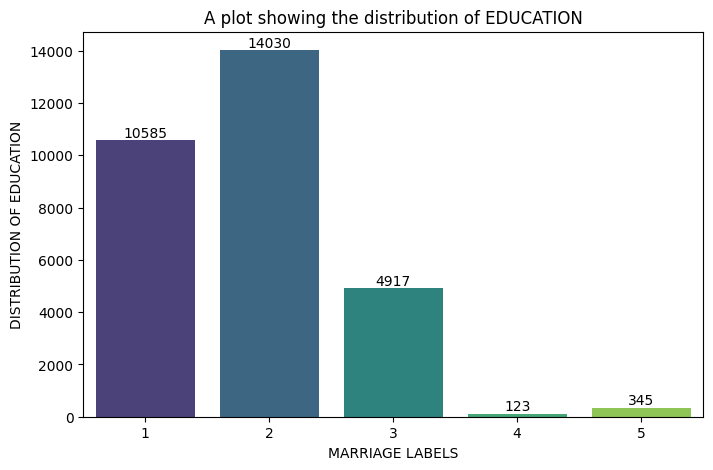

In [24]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df_copy,x = 'EDUCATION',palette='viridis')
#plt.xticks([1, 2, 3,4,5],education_vars)
plt.ylabel('Distribution of EDUCATION'.upper())
plt.xlabel('marriage labels'.upper())
for label in ax.containers:
    ax.bar_label(label)
plt.title("A plot showing the distribution of EDUCATION");

In [25]:
df_copy.SEX.value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

Note that 1 is male and 2 is female

In [26]:
SEX_VARS = ['male','female']

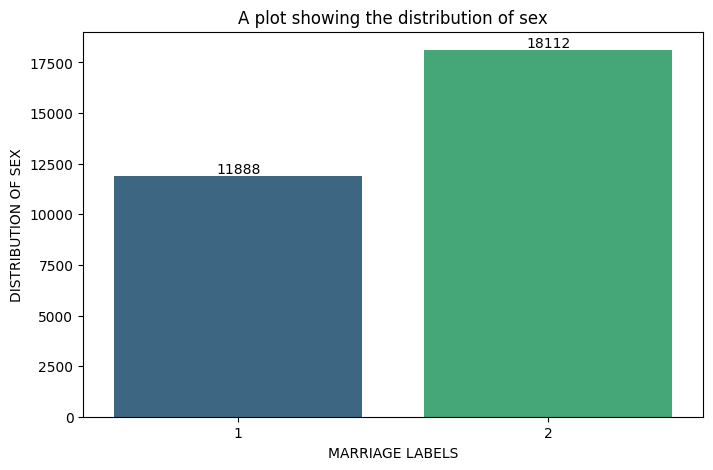

In [27]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df_copy,x = 'SEX',palette='viridis')
#plt.xticks([1, 2,],SEX_VARS)
plt.ylabel('Distribution of sex'.upper())
plt.xlabel('marriage labels'.upper())
for label in ax.containers:
    ax.bar_label(label)
plt.title("A plot showing the distribution of sex");

In [28]:
df_copy.AGE.value_counts()[-10:]


AGE
67    16
69    15
70    10
68     5
73     4
72     3
75     3
71     3
79     1
74     1
Name: count, dtype: int64

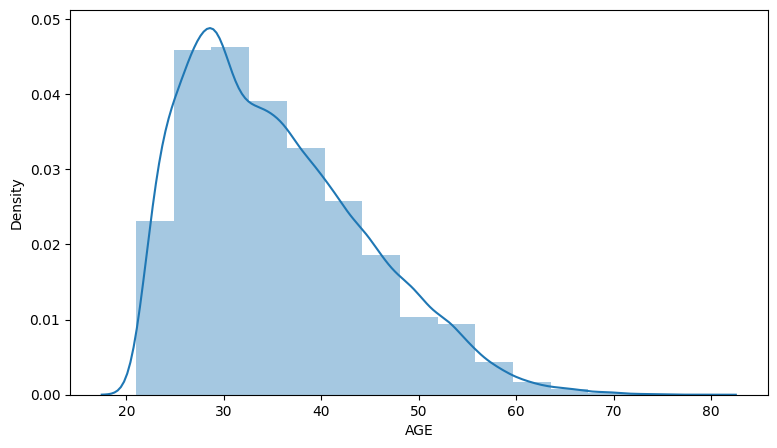

In [29]:
plt.subplots(figsize=(9,5))
sns.distplot(df_copy.AGE,bins=15)
plt.show()

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

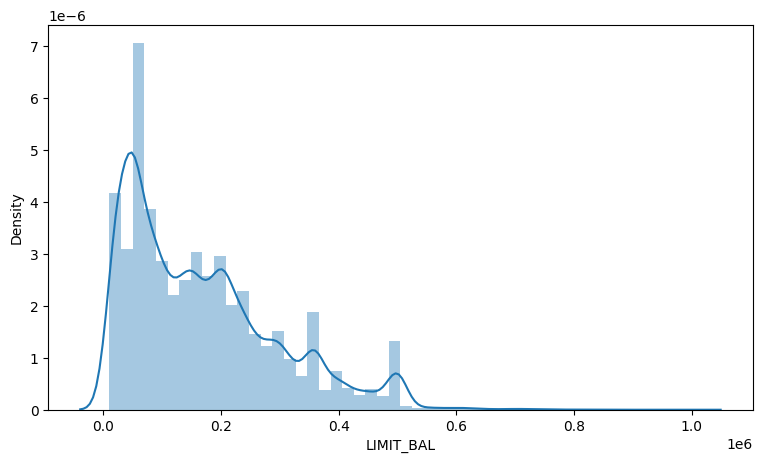

In [30]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df_copy.LIMIT_BAL)

next we check the distribution of age per class

In [31]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df_copy['AGE_BIN'] = pd.cut(x=df_copy.AGE, bins=bins, labels=names, right=True)

In [32]:
df_copy.AGE_BIN.value_counts()

AGE_BIN
21-30    11013
31-40    10713
41-50     6005
51-60     1997
61-70      257
71-80       15
Name: count, dtype: int64

In [33]:
ageNo = (df_copy.AGE_BIN[df_copy.DEFAULT_PAY == 0].value_counts())
ageYes = (df_copy.AGE_BIN[df_copy.DEFAULT_PAY == 1].value_counts())

In [34]:
ageNo,ageYes

(AGE_BIN
 21-30    8542
 31-40    8524
 41-50    4606
 51-60    1493
 61-70     189
 71-80      10
 Name: count, dtype: int64,
 AGE_BIN
 21-30    2471
 31-40    2189
 41-50    1399
 51-60     504
 61-70      68
 71-80       5
 Name: count, dtype: int64)

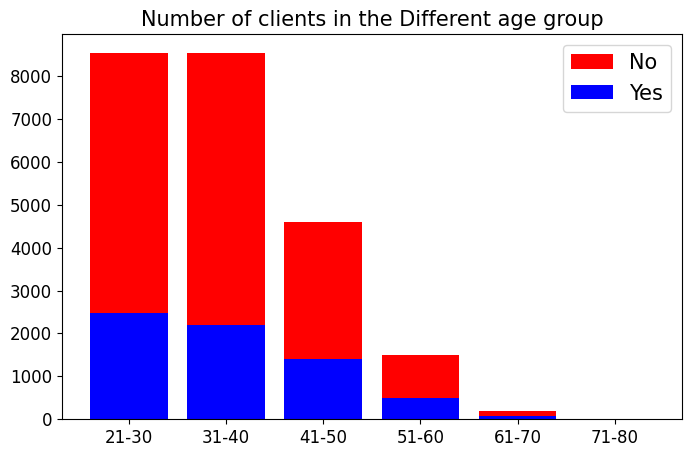

In [35]:
plt.subplots(figsize=(8,5))
plt.bar(ageNo.index, ageNo.values, label='No',color = 'red')
plt.bar(ageYes.index, ageYes.values, label='Yes',color = 'blue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in the Different age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

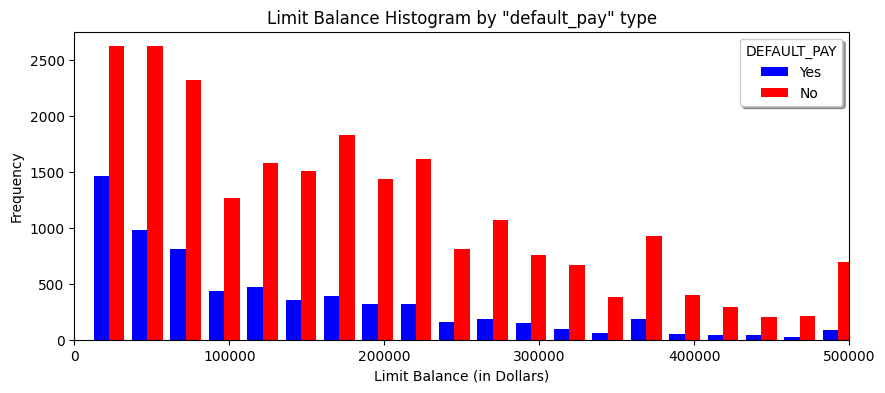

In [36]:
LimYes = list(df_copy[df_copy['DEFAULT_PAY'] == 1]['LIMIT_BAL'])
LimNo = list(df_copy[df_copy['DEFAULT_PAY'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(10,4))
plt.hist([LimYes, LimNo], bins = 40, color=['blue', 'red'])
plt.xlim([0,500000])
plt.legend(['Yes', 'No'], title = 'DEFAULT_PAY', loc='upper right', facecolor='white', shadow=True)
plt.xlabel('Limit Balance (in Dollars)')
plt.ylabel('Frequency')
plt.title('Limit Balance Histogram by "default_pay" type');

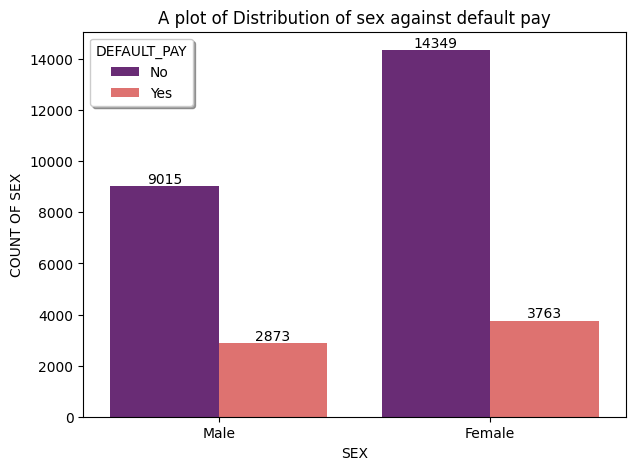

In [37]:
plt.figure(figsize=(7,5))

ax=sns.countplot(data=df_copy, x="SEX", hue="DEFAULT_PAY", palette="magma")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.ylabel('Count of Sex'.upper())
plt.title("A plot of Distribution of sex against default pay")
plt.legend(['No', 'Yes'], title = 'DEFAULT_PAY', loc='upper left', facecolor='white', shadow=True)
plt.show()

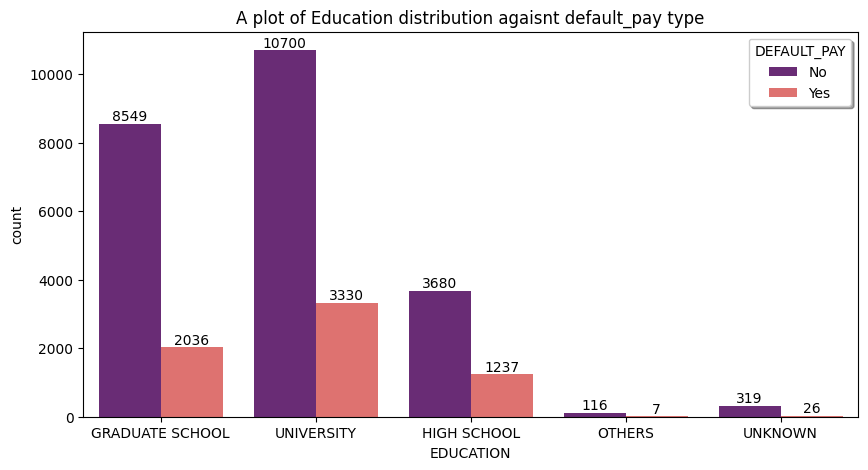

In [38]:
plt.figure(figsize=(10,5))

ax=sns.countplot(data=df_copy, x="EDUCATION", hue="DEFAULT_PAY", palette="magma")
#plt.xlim([0,60000])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3,4], labels=[var.upper() for var in education_vars])
plt.title("A plot of Education distribution agaisnt default_pay type")
plt.legend(['No', 'Yes'], title = 'DEFAULT_PAY', loc='upper right', facecolor='white', shadow=True)
plt.show()

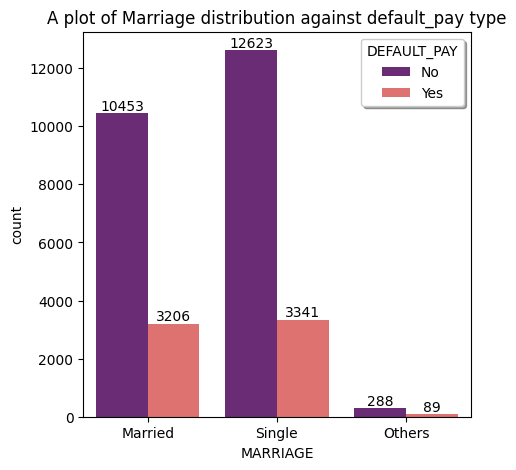

In [39]:
plt.figure(figsize=(5,5))

ax=sns.countplot(data=df_copy, x="MARRIAGE", hue="DEFAULT_PAY", palette="magma")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["Married", "Single", "Others"])
plt.title("A plot of Marriage distribution against default_pay type")
plt.legend(['No', 'Yes'], title = 'DEFAULT_PAY', loc='upper right', facecolor='white', shadow=True)
plt.show()

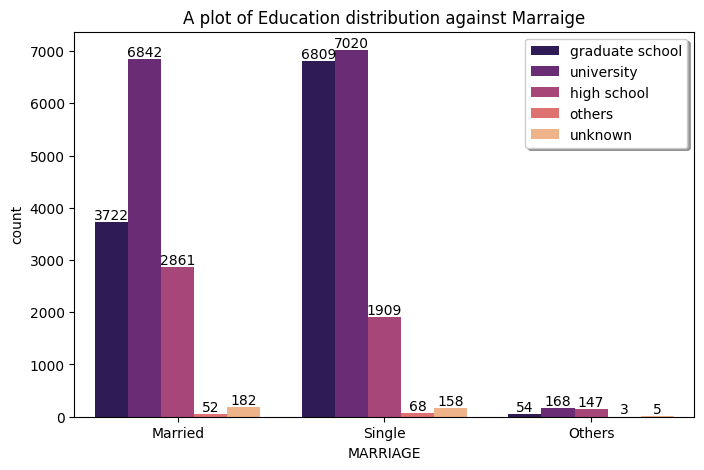

In [40]:
plt.figure(figsize=(8,5))

ax=sns.countplot(data=df_copy, x="MARRIAGE", hue="EDUCATION", palette="magma")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["Married", "Single", "Others"])
plt.title("A plot of Education distribution against Marraige")
plt.legend(loc='upper right', facecolor='white', shadow=True,labels = education_vars)
plt.show()

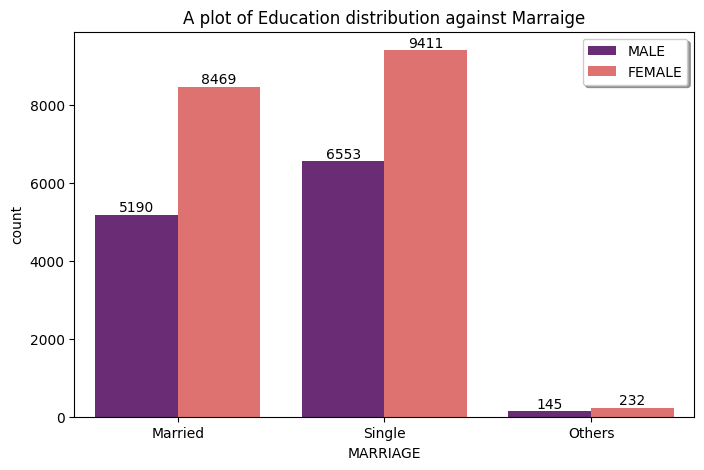

In [41]:
plt.figure(figsize=(8,5))

ax=sns.countplot(data=df_copy, x="MARRIAGE", hue="SEX", palette="magma")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["Married", "Single", "Others"])
plt.title("A plot of Education distribution against Marraige")
plt.legend(loc='upper right', facecolor='white', shadow=True,labels = ['MALE','FEMALE'])
plt.show()

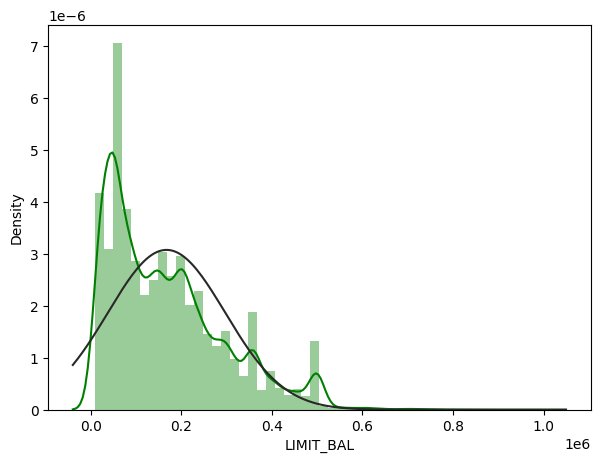

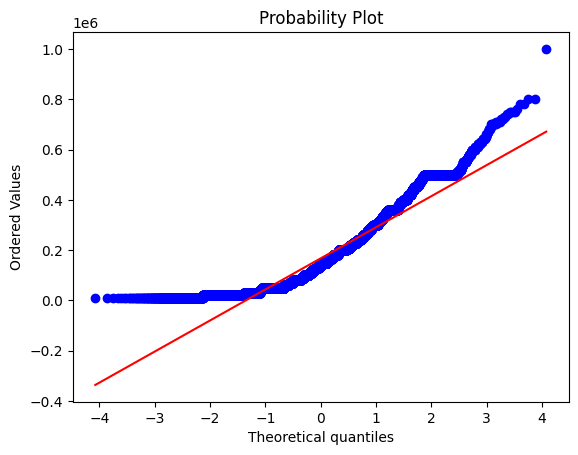

In [42]:
from scipy.stats import norm
from scipy import stats

plt.figure(figsize=(7,5))
plt.ylabel('')
sns.distplot(df_copy['LIMIT_BAL'], fit=norm, color="g");
fig = plt.figure()
res = stats.probplot(df_copy['LIMIT_BAL'], plot=plt)

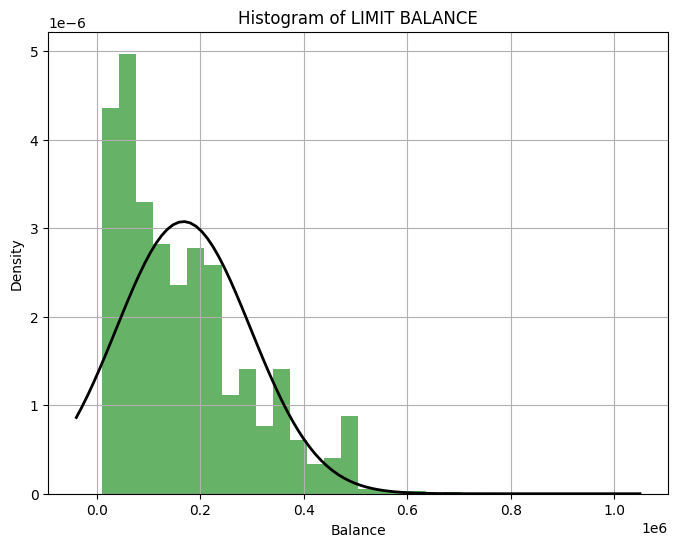

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df_copy.LIMIT_BAL, bins=30, density=True, alpha=0.6, color='g')

# Add a normal distribution fit to the histogram
mu, std = norm.fit(df_copy.LIMIT_BAL)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Customize the plot
plt.title('Histogram of LIMIT BALANCE')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.grid(True)

# Show plot
plt.show()


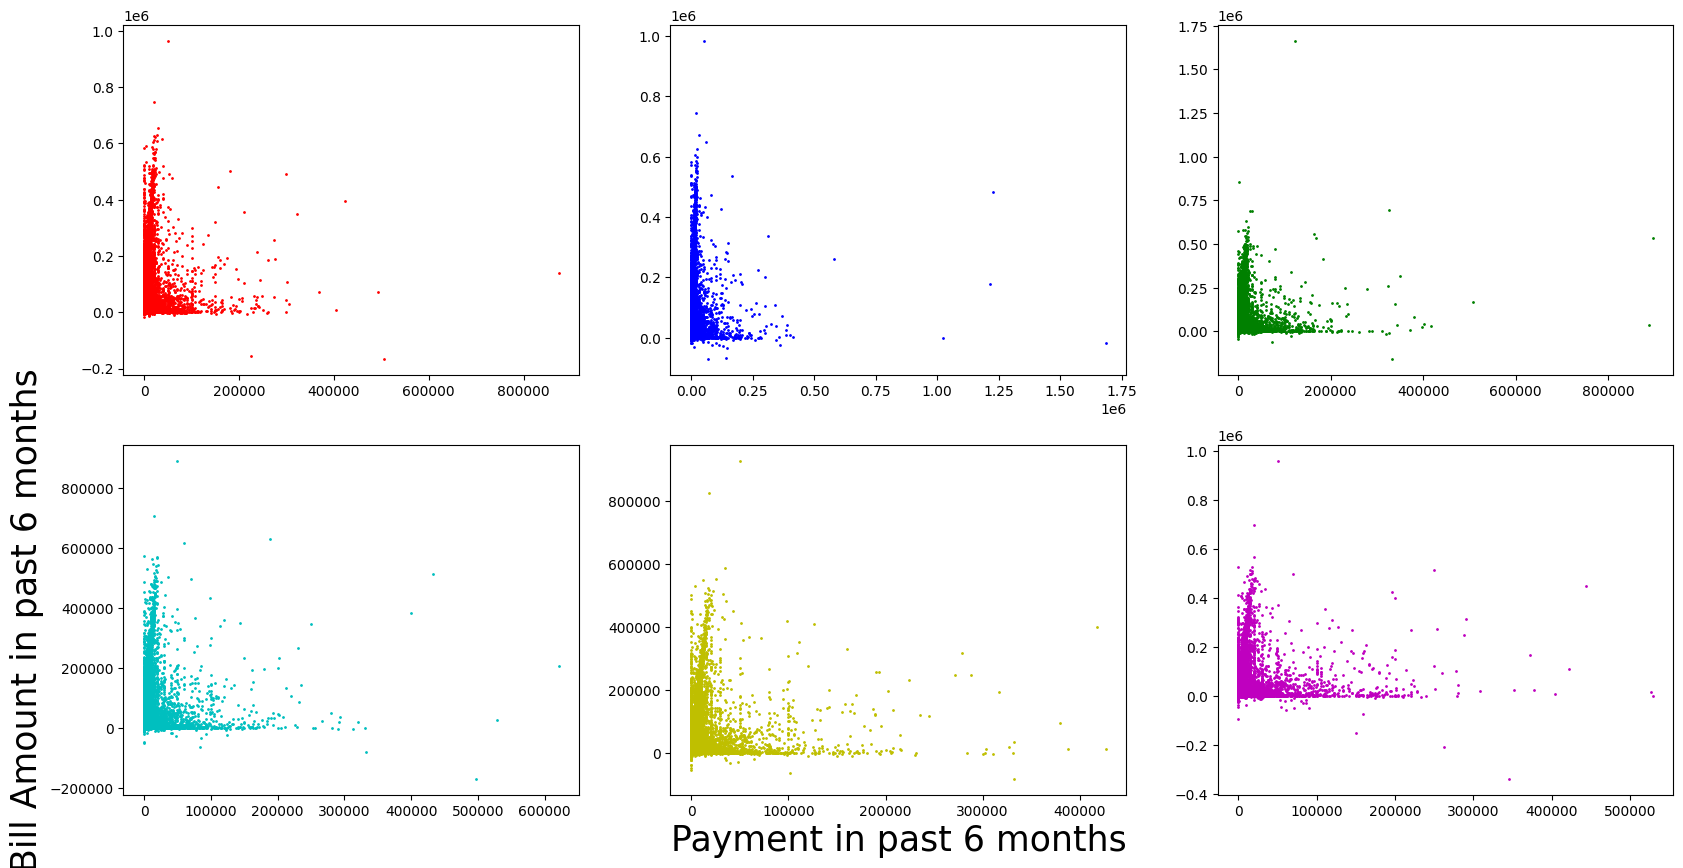

In [44]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df_copy.PAY_AMT1, y=df_copy.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df_copy.PAY_AMT2, y=df_copy.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df_copy.PAY_AMT3, y=df_copy.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df_copy.PAY_AMT4, y=df_copy.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df_copy.PAY_AMT5, y=df_copy.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df_copy.PAY_AMT6, y=df_copy.BILL_AMT6, c='m', s=1)

plt.show()


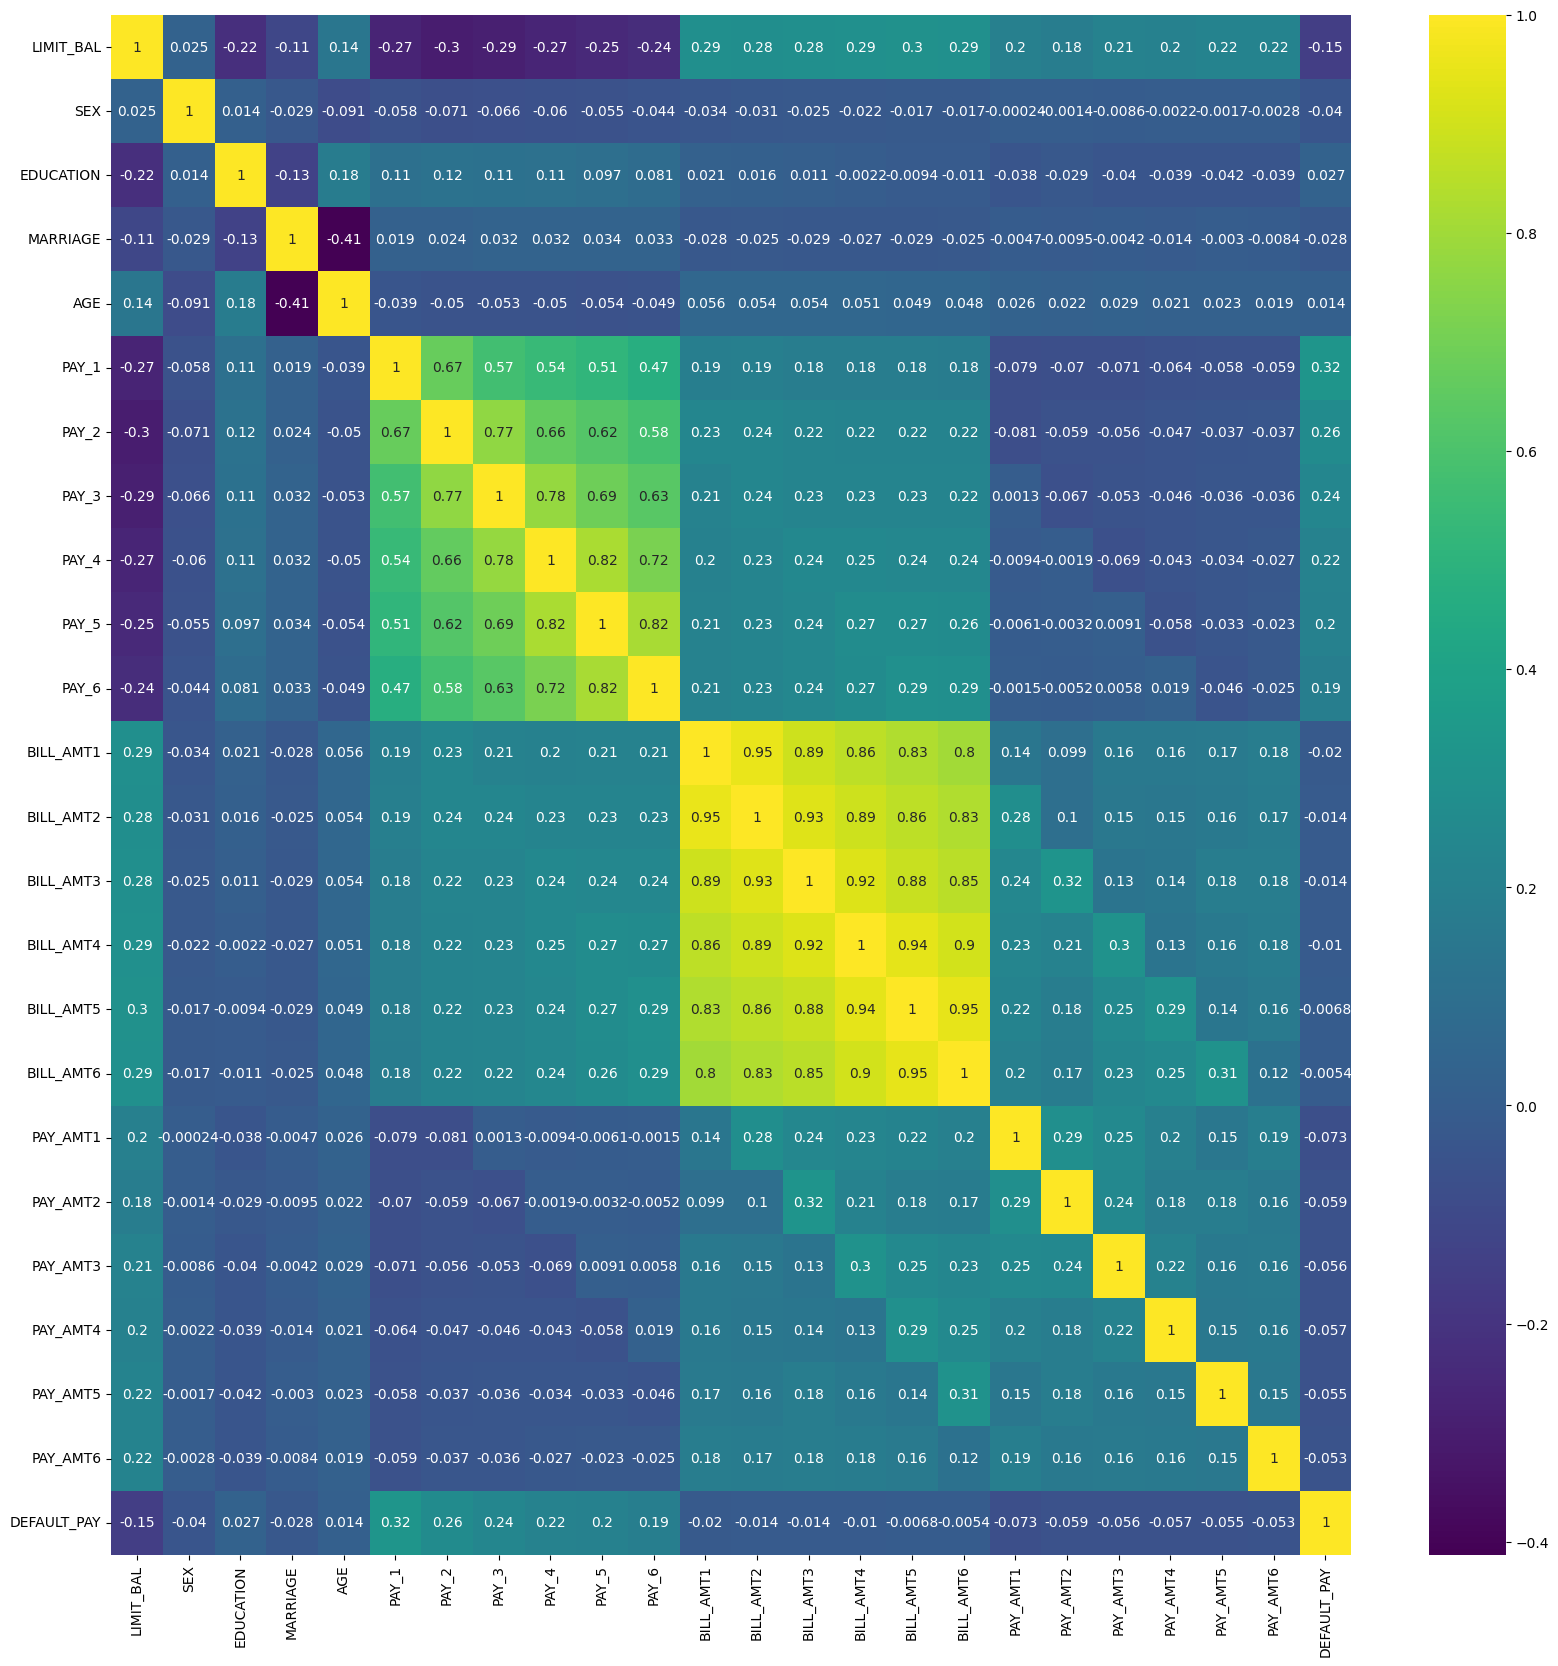

In [45]:
# Correlation matrix

CorrMat = df_copy.drop('AGE_BIN',axis = 1).corr()
plt.figure(figsize = (20,20))
sns.heatmap(CorrMat, annot=True,cmap = 'viridis');

data split for model training and validation

In [46]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LIMIT_BAL    30000 non-null  float64 
 1   SEX          30000 non-null  int64   
 2   EDUCATION    30000 non-null  int64   
 3   MARRIAGE     30000 non-null  int64   
 4   AGE          30000 non-null  int64   
 5   PAY_1        30000 non-null  int64   
 6   PAY_2        30000 non-null  int64   
 7   PAY_3        30000 non-null  int64   
 8   PAY_4        30000 non-null  int64   
 9   PAY_5        30000 non-null  int64   
 10  PAY_6        30000 non-null  int64   
 11  BILL_AMT1    30000 non-null  float64 
 12  BILL_AMT2    30000 non-null  float64 
 13  BILL_AMT3    30000 non-null  float64 
 14  BILL_AMT4    30000 non-null  float64 
 15  BILL_AMT5    30000 non-null  float64 
 16  BILL_AMT6    30000 non-null  float64 
 17  PAY_AMT1     30000 non-null  float64 
 18  PAY_AMT2     30000 non-nul

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
            'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = 'DEFAULT_PAY'
#df_copy.drop('AGE_BIN',axis = 1,inplace = True)
data = df_copy[features + [target]]
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

logistic regression

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7811666666666667
Precision: 1.0
Recall: 0.0
F1-score: 0.0


get feature importance

In [49]:
feature_importance = model.coef_[0]
logreg_fea_imp = sorted([(feature, importance) for feature, importance in zip(features, feature_importance)], key=lambda x: x[1], reverse=True)
logreg_fea_imp

[('BILL_AMT1', 9.789008284900017e-07),
 ('PAY_1', 4.849013436669864e-08),
 ('PAY_2', 3.886118751825736e-08),
 ('PAY_3', 3.517693043648854e-08),
 ('PAY_4', 3.41395877793632e-08),
 ('PAY_5', 3.2358113083431035e-08),
 ('PAY_6', 3.114054728535242e-08),
 ('SEX', -3.642672612399706e-08),
 ('MARRIAGE', -3.864867535007582e-08),
 ('EDUCATION', -4.5188292343724244e-08),
 ('PAY_AMT5', -3.554137975221232e-06),
 ('PAY_AMT6', -3.93655413205043e-06),
 ('LIMIT_BAL', -5.4805536556534146e-06),
 ('PAY_AMT4', -6.740318990828328e-06),
 ('PAY_AMT3', -6.8468596478092505e-06),
 ('PAY_AMT2', -2.430481634047978e-05),
 ('PAY_AMT1', -2.4747684698665108e-05)]

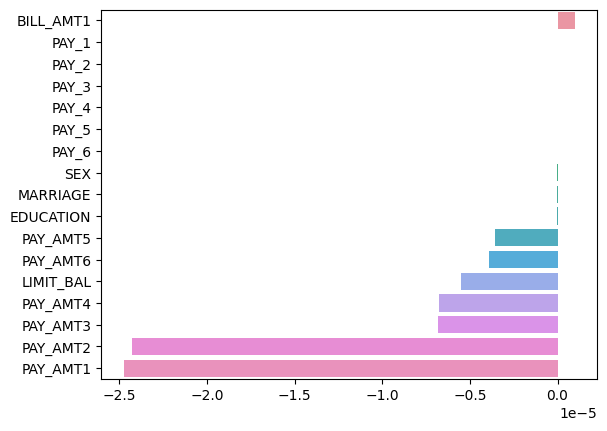

In [50]:
sns.barplot(y = [x[0] for x in logreg_fea_imp],x = [x[1] for x in logreg_fea_imp]);

data scaling

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

targ = 'DEFAULT_PAY'
X = df_copy.drop(['DEFAULT_PAY','AGE_BIN'], axis=1)
y = df_copy[targ]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}
model = LogisticRegression(solver='liblinear',verbose=False)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy',verbose=False)
grid_search.fit(X_scaled[:20000], y[:20000])
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate model on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_scaled[20000:], y[20000:])
print("Test accuracy:", test_accuracy)

scores = cross_val_score(best_model, X_scaled, y, cv=10, scoring='roc_auc')
mean_score = scores.mean()
print("Mean AUC:", mean_score)

Best hyperparameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Test accuracy: 0.8206
Mean AUC: 0.7222121063675366


In [52]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(f'classification report is: {classification_report(best_model.predict(X_scaled[20000:]),y[20000:])}')
print(f'accuracy score for model is: {accuracy_score(best_model.predict(X_scaled[20000:]),y[20000:])}')
print(f'Confusion matrix for model is: {confusion_matrix(best_model.predict(X_scaled[20000:]),y[20000:])}')

classification report is:               precision    recall  f1-score   support

           0       0.98      0.83      0.90      9406
           1       0.21      0.74      0.33       594

    accuracy                           0.82     10000
   macro avg       0.60      0.78      0.61     10000
weighted avg       0.93      0.82      0.86     10000

accuracy score for model is: 0.8206
Confusion matrix for model is: [[7767 1639]
 [ 155  439]]


In [53]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8]
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_scaled[:20000], y[:20000])

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters:", best_params)
predictions = best_model.predict(X_scaled[20000:])
test_accuracy = best_model.score(X_scaled[20000:], y[20000:])
print("Test accuracy:", test_accuracy)
scores = cross_val_score(best_model,X_scaled[20000:], y[20000:], cv=10, scoring='roc_auc')
mean_score = scores.mean()
print("Mean AUC:", mean_score)

Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy: 0.8321
Mean AUC: 0.6972014974710092


In [54]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(f'classification report is: {classification_report(best_model.predict(X_scaled[20000:]),y[20000:])}')
print(f'accuracy score for model is: {accuracy_score(best_model.predict(X_scaled[20000:]),y[20000:])}')
print(f'Confusion matrix for model is: {confusion_matrix(best_model.predict(X_scaled[20000:]),y[20000:])}')

classification report is:               precision    recall  f1-score   support

           0       0.97      0.84      0.90      9093
           1       0.31      0.72      0.44       907

    accuracy                           0.83     10000
   macro avg       0.64      0.78      0.67     10000
weighted avg       0.91      0.83      0.86     10000

accuracy score for model is: 0.8321
Confusion matrix for model is: [[7668 1425]
 [ 254  653]]


In [ ]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1, 10]
}
clf = SVC()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_scaled[:20000], y[:20000])

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters:", best_params)
predictions = best_model.predict(X_scaled[20000:])
test_accuracy = best_model.score(X_scaled[20000:], y[20000:])
print("Test accuracy:", test_accuracy)
scores = cross_val_score(best_model,X_scaled[20000:], y[20000:], cv=10, scoring='roc_auc')
mean_score = scores.mean()
print("Mean AUC:", mean_score)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(f'classification report is: {classification_report(best_model.predict(X_scaled[20000:]),y[20000:])}')
print(f'accuracy score for model is: {accuracy_score(best_model.predict(X_scaled[20000:]),y[20000:])}')
print(f'Confusion matrix for model is: {confusion_matrix(best_model.predict(X_scaled[20000:]),y[20000:])}')

In [57]:
targ = 'DEFAULT_PAY'
X = df_copy.drop(['DEFAULT_PAY','AGE_BIN'], axis=1)
y = df_copy[targ]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,shuffle = True)

In [62]:
import tensorflow as tf

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_performance = (float('inf'), 0)  # Initialize with high loss and low accuracy

def create_neural_network(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

def initialize_neural_network():
    model = create_neural_network(input_shape=(num_features,))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_neural_network(model, X_train, y_train):
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    return model.evaluate(X_train, y_train, verbose=1)

def update_particle_position(particle):
    w = particle.best_position
    v = particle.velocity
    p = particle.position
    c1, c2 = 2.0, 2.0  # PSO coefficients
    
    new_v = w * v + c1 * np.random.rand() * (particle.best_position - p) + c2 * np.random.rand() * (particle.global_best_position - p)
    new_position = p + new_v
    particle.position = new_position
    particle.velocity = new_v

def update_particle_best_positions(particle):
    if particle.performance[0] < particle.best_performance[0]:  # Lower loss is better
        particle.best_position = particle.position
        particle.best_performance = particle.performance

def update_global_best_position(swarm):
    global_best_particle = min(swarm, key=lambda x: x.best_performance[0])
    for particle in swarm:
        particle.global_best_position = global_best_particle.best_position

# Load dataset
#data = pd.read_csv('credit_card_data.csv')

# Preprocessing
# Assume the last column is the target variable
#X = data.iloc[:, :-1].values
#y = data.iloc[:, -1].values

# Initialize neural network
num_features = X.shape[1]
neural_network = initialize_neural_network()

# Initialize swarm
swarm_size = 5
swarm = [Particle(np.random.rand(num_features)) for _ in range(swarm_size)]
update_global_best_position(swarm)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for particle in swarm:
        particle_loss, particle_accuracy = train_neural_network(neural_network, X_train, y_train)
        particle.performance = (particle_loss, particle_accuracy)
        update_particle_position(particle)
        update_particle_best_positions(particle)
    update_global_best_position(swarm)

# Final result
best_particle = min(swarm, key=lambda x: x.best_performance[0])
best_weights = best_particle.best_position

print("Best weights:", best_weights)

750/750 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7784
Best weights: [ 0.05632718  1.33676808  0.03550553  0.7124565   0.02010298 -0.01303616
  2.37709909  0.77375619  2.35561006 -0.03560054  0.3547605  -0.02942584
  0.01949794  0.63940926  1.02061124  1.13170586  3.17069545  0.56711653
  1.42242418  0.40380046  1.5009488   0.3834799   0.42528145]


In [65]:
print(f'CSBPN model accuracy is {particle_accuracy}')
print(f'CSBPN model loss is {particle_loss}')

CSBPN model accuracy is 0.7783750295639038
CSBPN model loss is 0.5282827019691467


In [70]:
neural_network.evaluate(X_test,y_test,verbose = 1)

188/188 [==============================] - 0s 1ms/step - loss: 1.8966 - accuracy: 0.7810


[1.8965840339660645, 0.781000018119812]

In [78]:
#save and reload model
import datetime
def save_model(model,suffix = None):
    modeldir = os.path.join('/kaggle/working/saved_models',datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
    model_path = modeldir + '-' + suffix + '.h5' #save format of model
    print(f'saving model to: {model_path}...')
    model.save(model_path)
    return model_path

In [80]:
save_model(neural_network,suffix = 'CSBPN_model')

saving model to: /kaggle/working/saved_models/20240301-13001709298024-CSBPN_model.h5...


'/kaggle/working/saved_models/20240301-13001709298024-CSBPN_model.h5'